[tutorial: working with tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

Note: that operators ending with an underscore are "in-place operators" (modifiying the operand in place).

In [3]:
import torch
import numpy as np

# converting from np -> torch.tensor
data = np.array([[1,2], [3,4]])
display(data)
t_data = torch.from_numpy(data)
display(t_data)

# get tensor as np object (note both objects will share the same memory!)
print('converted to np.array:')
tmp = t_data.numpy()
display(tmp)

t_data.add_(1)
display(tmp)

# matrix multiplication (t_data multiplied by its transpose)
print('result of matrix multiplication:')
res = t_data.mul(t_data.T)
display(res)
print("equivalently:")
display(t_data @ t_data.T)

print(".item() converts scalars back to python datatypes:")
var = torch.tensor(5).item()
print(f"var={var} has type {type(var)}")

array([[1, 2],
       [3, 4]])

tensor([[1, 2],
        [3, 4]])

converted to np.array:


array([[1, 2],
       [3, 4]])

array([[2, 3],
       [4, 5]])

result of matrix multiplication:


tensor([[ 4, 12],
        [12, 25]])

equivalently:


tensor([[13, 23],
        [23, 41]])

.item() converts scalars back to python datatypes:
var=5 has type <class 'int'>


[tutorial: datasets](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

[tutorial: transforms](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html), [transforms API](https://pytorch.org/vision/stable/transforms.html)


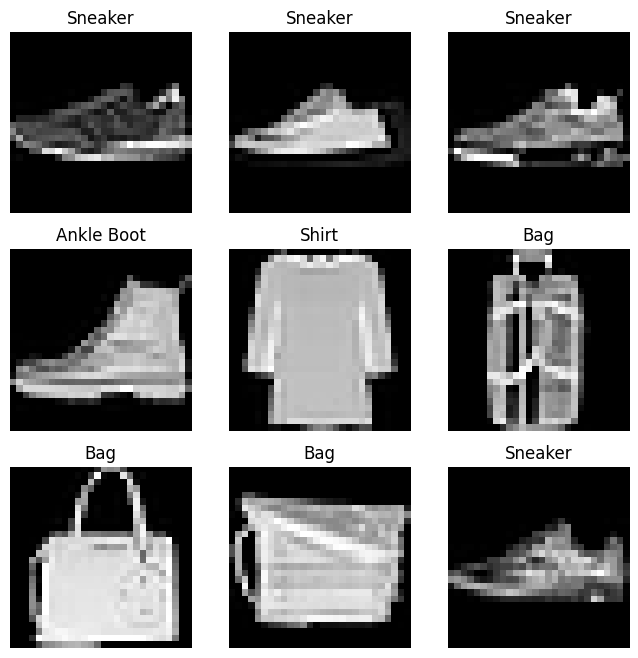

practicing transforms:
type(img)=<class 'torch.Tensor'>, type(label)=<class 'int'>
label = 2
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.4275, 0.3961, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0275, 0.6078, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3176,
          0.8588, 0.9412, 0.9529, 1.0000, 0.8706, 0.7804, 0.7490, 0.7529,
          0.9059, 0.9255, 0.9569, 0.9373, 0.9294, 0.0627, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0314, 0.9176,
          0.9294, 0.8902, 0.9059, 0.9137, 0.9529, 0.9608, 0.9686, 0.9686,
          0.9373, 0.9059, 0.8902, 0.8863, 0.9608, 0.7843, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3294, 0.9804,
          0.8824, 0.9216, 0.9098, 0.90

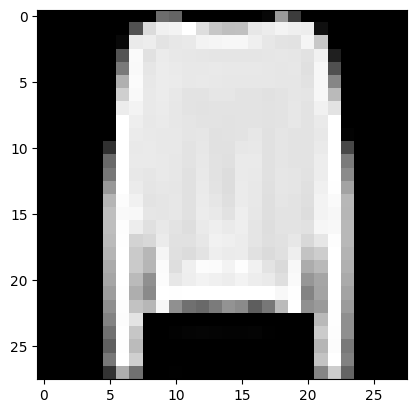

In [13]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # The FashionMNIST features are in PIL Image format
    #   ToTensor converts a PIL image or NumPy ndarray into a FloatTensor
    #   and scales the image’s pixel intensity values in the range [0., 1.]
    transform=ToTensor(),
    # if we include this line, labels get mapped to tensors instead of being a single int
    #target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# visualizing items in dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

print("practicing transforms:")
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
print(f"type(img)={type(img)}, type(label)={type(label)}")
print(f"label = {label}")
print(img)
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#img = transforms.RandAugment().forward(img)
#plt.imshow(img.squeeze(), cmap="gray")
#plt.show()